<a href="https://colab.research.google.com/github/o-naim/ADM-3708/blob/main/ADM_CRISIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
url="https://raw.githubusercontent.com/o-naim/ADM-3708/refs/heads/main/Crisis_dataset.csv"

df = pd.read_csv(url)
df.head()


,Personality Type,Management Style,Communication Style,Crisis Type,Team Role,Stress Management,Satisfaction Factor,Leadership Style,Work Environment,Resolution Style,Learning Style
0,ISTJ,Analytical,reserved styles,community-driven events,Communicator,Goal setting,creativity,Innovative,Independent,collaboration,social interaction
1,ENFJ,Directive,clarity and conciseness,Family crises,Supporter,Self-care,impact,transactional,Flexible,advisory,adaptive
2,ISTP,Creative,clarity and conciseness,impactful life events,Analyst,Delegation,achievement,Transformational,Flexible,avoidance,sensory-based learning
3,ESFJ,Authoritative,clarity and conciseness,Family crises,Analyst,Mindfulness,efficiency,Transformational,Supportive,avoidance,hands-on learning
4,ENTP,Supportive,assertive styles,community-driven events,Advisor,Self-care,achievement,collaborative,Dynamic,advisory,hands-on learning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Personality Type     10000 non-null  object
 1   Management Style     10000 non-null  object
 2   Communication Style  10000 non-null  object
 3   Crisis Type          10000 non-null  object
 4   Team Role            10000 non-null  object
 5   Stress Management    10000 non-null  object
 6   Satisfaction Factor  10000 non-null  object
 7   Leadership Style     10000 non-null  object
 8   Work Environment     10000 non-null  object
 9   Resolution Style     10000 non-null  object
 10  Learning Style       10000 non-null  object
dtypes: object(11)
memory usage: 859.5+ KB


In [ ]:
#ajout de columne
target = []
i=0
arr =["-1","0","1"] #where -1 is neg, 0neutral, 1 positive reaction

for _ in range(df.shape[0]):
    target.append(random.choice(arr))


df["Crisis Impact"] = target


df.head()

,Personality Type,Management Style,Communication Style,Crisis Type,Team Role,Stress Management,Satisfaction Factor,Leadership Style,Work Environment,Resolution Style,Learning Style,Crisis Impact
0,ISTJ,Analytical,reserved styles,community-driven events,Communicator,Goal setting,creativity,Innovative,Independent,collaboration,social interaction,1
1,ENFJ,Directive,clarity and conciseness,Family crises,Supporter,Self-care,impact,transactional,Flexible,advisory,adaptive,-1
2,ISTP,Creative,clarity and conciseness,impactful life events,Analyst,Delegation,achievement,Transformational,Flexible,avoidance,sensory-based learning,-1
3,ESFJ,Authoritative,clarity and conciseness,Family crises,Analyst,Mindfulness,efficiency,Transformational,Supportive,avoidance,hands-on learning,-1
4,ENTP,Supportive,assertive styles,community-driven events,Advisor,Self-care,achievement,collaborative,Dynamic,advisory,hands-on learning,-1


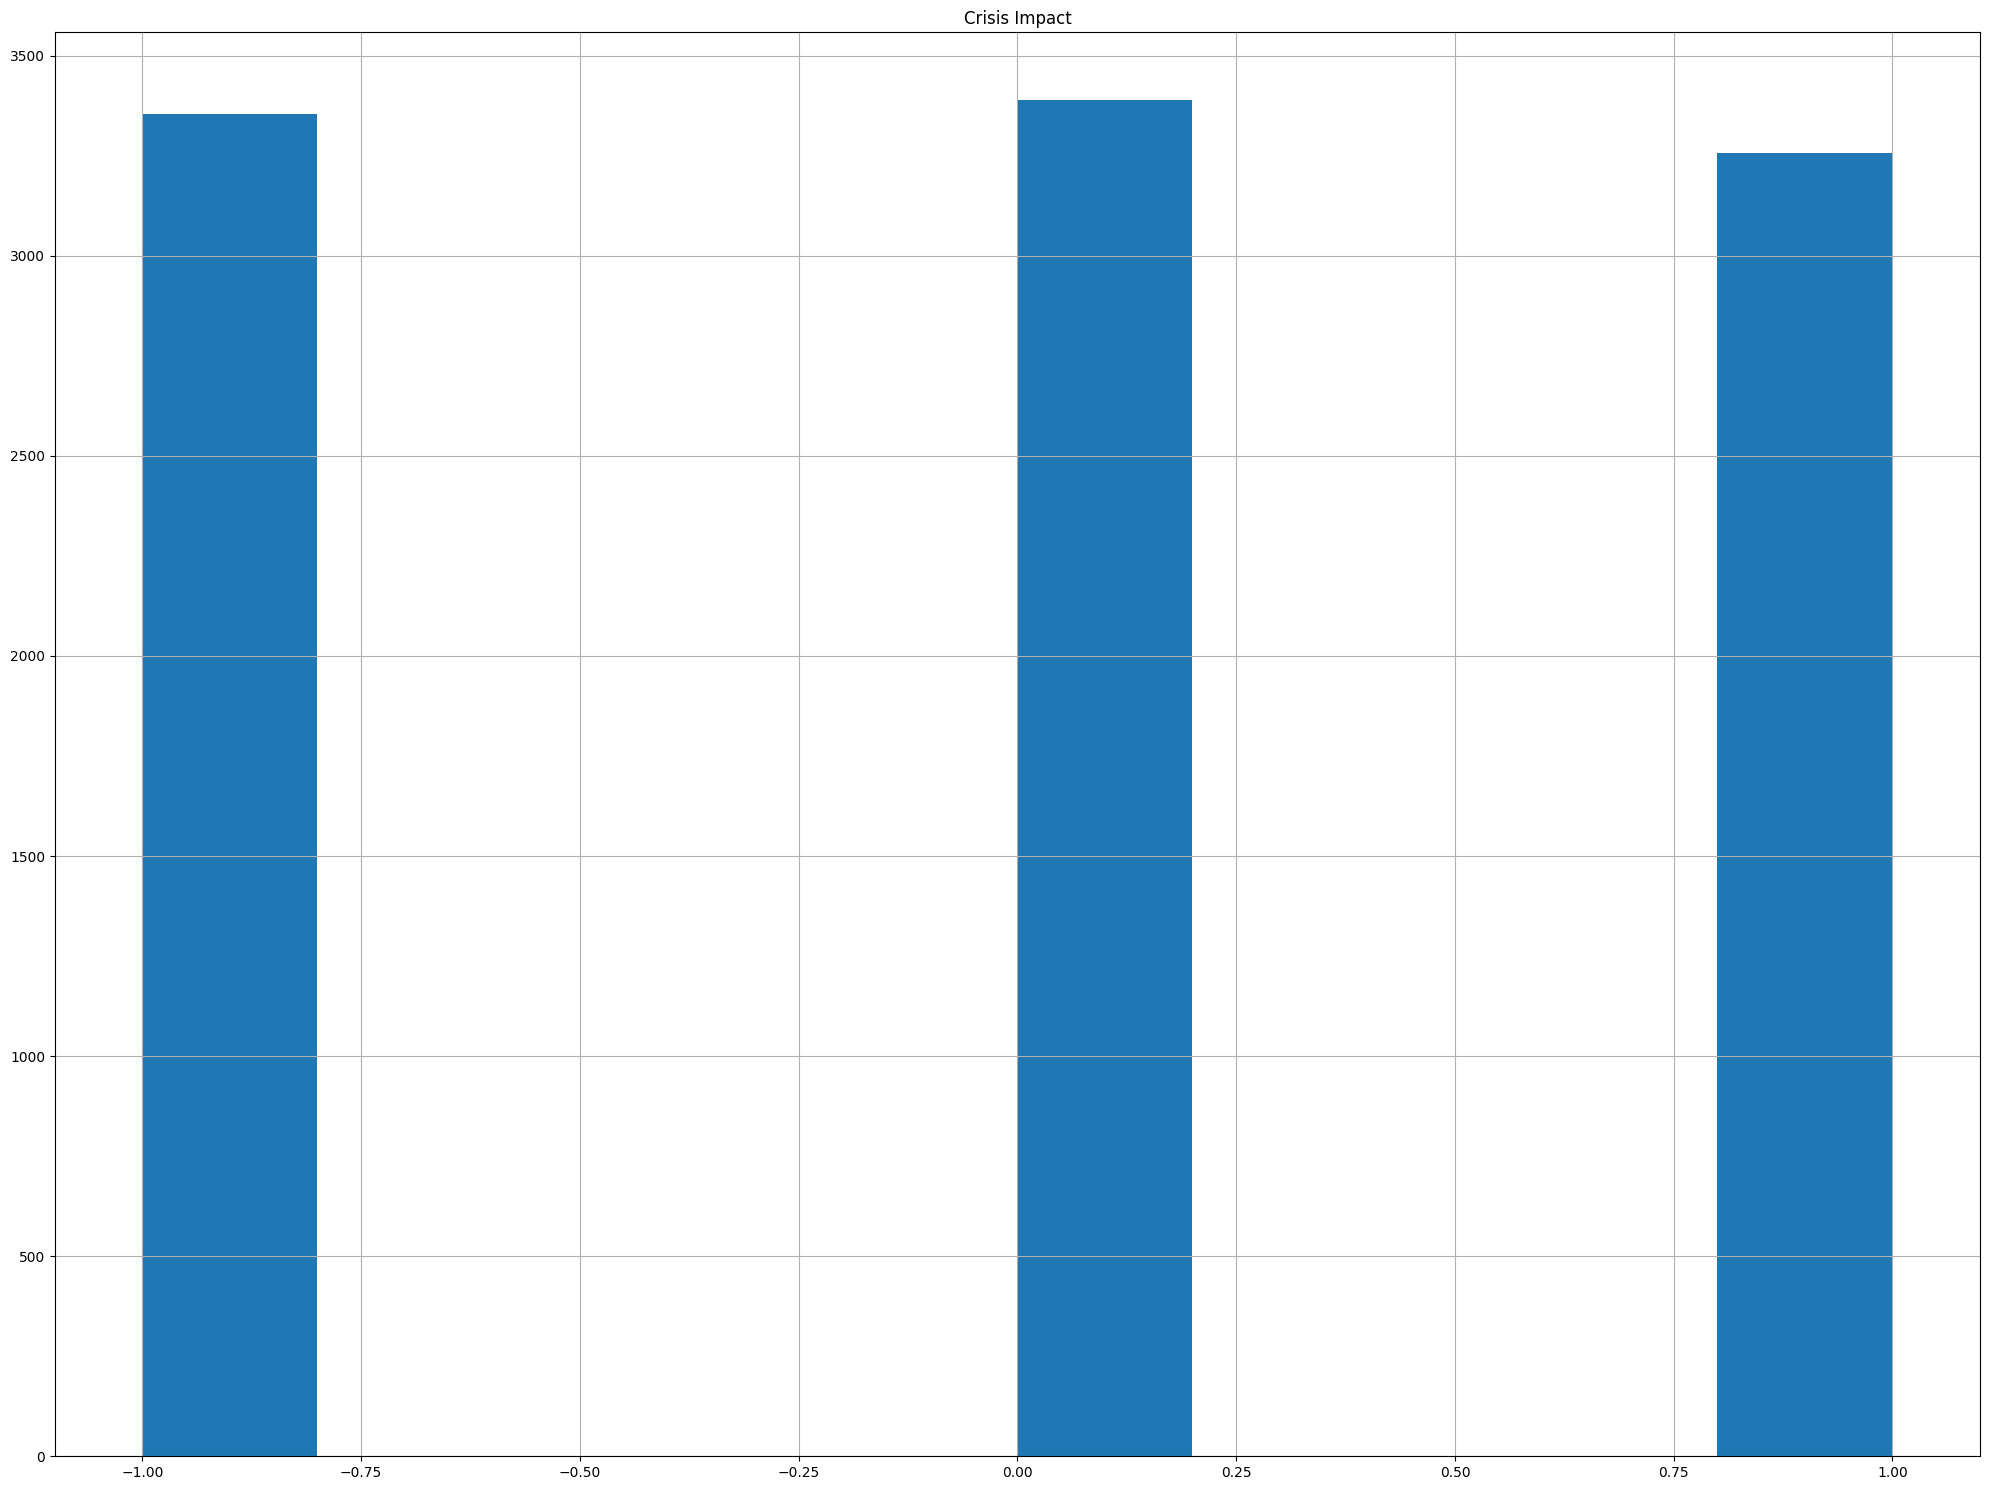

In [ ]:
# Convert 'Crisis Impact' to integers
df["Crisis Impact"] = df["Crisis Impact"].astype(int)



numerical_columns = ['Crisis Impact']
# Plot histograms for each column
df[numerical_columns].hist(bins=10, figsize=(20, 15))
plt.tight_layout()
plt.show()

The data is balanced, which is already prepared for a ml op

In [ ]:
print(df['Crisis Impact'].value_counts())

Crisis Impact
 0    3455
 1    3318
-1    3227
Name: count, dtype: int64


Training and target data: Set the Python variable X to designate the data and y to designate the target class. Make sure to select only the informative features.

     Personality Type Management Style      Communication Style  Crisis Type  \
0                ISTJ       Analytical          reserved styles          NaN   
1                ENFJ        Directive  clarity and conciseness          NaN   
2                ISTP         Creative  clarity and conciseness          NaN   
3                ESFJ    Authoritative  clarity and conciseness          NaN   
4                ENTP       Supportive         assertive styles          NaN   
...               ...              ...                      ...          ...   
9995             ENTP       Structured         assertive styles          NaN   
9996             INFJ       Supportive  clarity and conciseness          NaN   
9997             ENTJ           Caring          reserved styles          NaN   
9998             ISTJ       Analytical          reserved styles          NaN   
9999             ESTP       Analytical         assertive styles          NaN   

         Team Role    Stress Management

In [ ]:
df.head()

,Personality Type,Management Style,Communication Style,Crisis Type,Team Role,Stress Management,Satisfaction Factor,Leadership Style,Work Environment,Resolution Style,Learning Style,Crisis Impact
0,ISTJ,Analytical,reserved styles,community-driven events,Communicator,Goal setting,creativity,Innovative,Independent,collaboration,social interaction,1
1,ENFJ,Directive,clarity and conciseness,Family crises,Supporter,Self-care,impact,transactional,Flexible,advisory,adaptive,-1
2,ISTP,Creative,clarity and conciseness,impactful life events,Analyst,Delegation,achievement,Transformational,Flexible,avoidance,sensory-based learning,-1
3,ESFJ,Authoritative,clarity and conciseness,Family crises,Analyst,Mindfulness,efficiency,Transformational,Supportive,avoidance,hands-on learning,-1
4,ENTP,Supportive,assertive styles,community-driven events,Advisor,Self-care,achievement,collaborative,Dynamic,advisory,hands-on learning,-1


In [ ]:
#after data replacemnet set x,y to work on the training/test split
features=['', '', '', '']
target=['Crisis Impact']
x= df[features]
y=df[target]
# couldnt finish, i coulsnt map the crisis type to int; to further analysis, stped here, to make one vs all classififiactaion